/Users/TheLuggage/anaconda2/envs/astroconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


('slope is', 5.864784559099431)
('intercept is', 37.154171097561154)
('Error in slope is', 0.038697920835917173)
('Error in intercept is', 86.707317073170643)


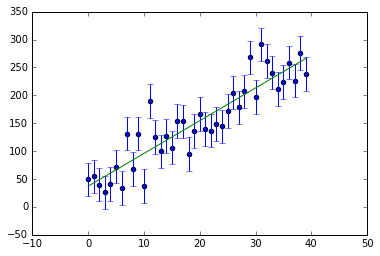

()
('slope', 5.8647845590994372)
('intercept', 37.154171097560976)
('CI for slope is', 5.9034824799353478, 5.8260866382635141)
('CI for intercept is', 123.8614881707318, -49.553145975609489)


In [1]:
# Program to fit a linear least squares regression line to data,
# calculate errors in fit parameters, and calculate a 68% confidence interval

import matplotlib.pyplot as plt
import numpy as np
from numpy import array
import scipy as scipy
from scipy import stats

# Read in data
data = open('/Users/TheLuggage/anaconda2/data_mindy.v3.dat', 'r') 
lines = data.readlines()[1:] # start reading at line 2

data.close() 

# Create array
x = []
y = []
dy = []

# Append data to the array
for line in lines:
    p = line.split()
    x.append(float(p[0]))
    y.append(float(p[1]))
    dy.append(float(p[2])) 
        
# Create a vector
xVec = np.array(x)
yVec = np.array(y)
dyVec = np.array(dy)
# print("yVec is", yVec)
# print(dyVec)

# Plot raw data with error bars
plt.scatter(xVec, yVec)
plt.errorbar(xVec,yVec,yerr=dyVec, linestyle="None")
# plt.show()

# Create arrays used in weighted least squares slope, intercept,
# and errors in the slope and intercept

# The following computes the various sums needed to calculate slope,
# intercept, and errors

xe = []
xe = xVec/(dyVec)**2.
xesum = np.sum(xe)

ye = []
ye = yVec/(dyVec)**2.
yesum = np.sum(ye)

xye = []
xye = (xVec * yVec)/(dyVec)**2.
xyesum = np.sum(xye)

invesq = []
invesq = 1./(dyVec)**2.
invesqsum = np.sum(invesq)

xsqe = []
xsqe = ((xVec)**2.)/(dyVec)**2.
xsqesum = np.sum(xsqe)

inve = []
inve = 1/dyVec
invesum = np.sum(inve)

# Calculate slope
a = ((xesum * yesum) - (xyesum * invesqsum)) / (xesum**2. - (xsqesum * invesqsum))
print("slope is", a)

# Calculate intercept
b = (xyesum - (a * xsqesum)) / xesum
print("intercept is", b)

# Calculate error in slope
aErr = (invesqsum / ((xsqesum * invesum) - xesum**2.))**0.5
print("Error in slope is", aErr)

# Calculate error in intercept
bErr = (xsqesum / ((xsqesum * invesqsum) - xesum**2.))
print("Error in intercept is", bErr)

y = a*xVec + b
plt.plot(y)
plt.show()

# Compare calculated parameters to parameters computed by python function
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(xVec, yVec)
print()
print("slope", slope)
print("intercept", intercept)

# Compute margin of error
# t*stdev
# t score for 68% CI is 1

t = 1.
aMOE = t*aErr
bMOE = t*bErr
	
aCIhigh = a + aMOE
aCIlow = a - aMOE

bCIhigh = b + bMOE
bCIlow = b - bMOE

print("CI for slope is", aCIhigh, aCIlow)
print("CI for intercept is", bCIhigh, bCIlow)
